In [1]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/home/abithan_ubuntu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
file_path = os.path.join(os.getcwd(), 'dataset/sinusoidal_dataset_20260125_153718.csv')
print(f"Loading data from: {file_path}")

Loading data from: /data/ros2/ros2_ws2/arm_bot/src/scripts/dataset/sinusoidal_dataset_20260125_153718.csv


In [3]:
def load_dataset_file(filepath):
    """
    Load the dataset CSV file (move_q2_traj format).
    Format: First column is label, rest are values at different time steps.
    """
    data = pd.read_csv(filepath)
    
    # Extract relevant arrays
    time = data['time_elapsed']
    pos1 = data['gazebo_pos1']
    pos2 = data['gazebo_pos2']
    pos3 = data['gazebo_pos3']
    vel1 = data['gazebo_vel1']
    vel2 = data['gazebo_vel2']
    vel3 = data['gazebo_vel3']
    tau1 = data['injected_tau1']
    tau2 = data['injected_tau2']
    tau3 = data['injected_tau3']
    
    return time, pos1, pos2, pos3, vel1, vel2, vel3, tau1, tau2, tau3

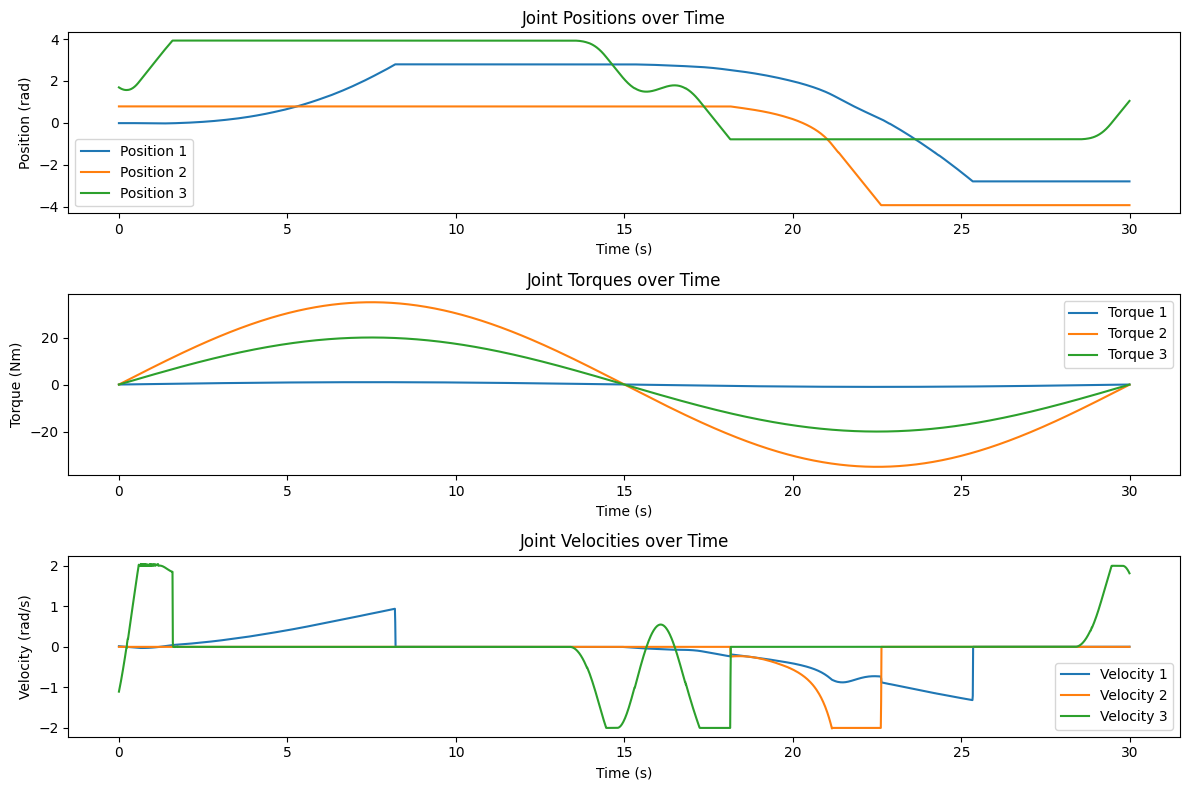

In [6]:
time, pos1, pos2, pos3, vel1, vel2, vel3, tau1, tau2, tau3 = load_dataset_file(file_path)

# Plot positions
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(time, pos1, label='Position 1')
plt.plot(time, pos2, label='Position 2')
plt.plot(time, pos3, label='Position 3')
plt.title('Joint Positions over Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (rad)')
plt.legend()

# plot torques
plt.subplot(3, 1, 2)
plt.plot(time, tau1, label='Torque 1')
plt.plot(time, tau2, label='Torque 2')
plt.plot(time, tau3, label='Torque 3')
plt.title('Joint Torques over Time')
plt.xlabel('Time (s)')
plt.ylabel('Torque (Nm)')
plt.legend()

# Plot velocities
plt.subplot(3, 1, 3)
plt.plot(time, vel1, label='Velocity 1')
plt.plot(time, vel2, label='Velocity 2')
plt.plot(time, vel3, label='Velocity 3')
plt.title('Joint Velocities over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (rad/s)')
plt.legend()

plt.tight_layout()
# plt.show()
plt.savefig('joint_data_plots.png')